In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import datetime
from itertools import islice

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
def parse_timestamp(el):
    b = datetime.datetime.strptime(el, fmt)
    return b

In [4]:
def create_date_col(df_m):
    date_lst = []
    for index, row in df_m.iterrows():
        day = str(df_m['ride_begin'][index].day)
        month = str(df_m['ride_begin'][index].month)
        year = str(df_m['ride_begin'][index].year)
        date_text = year + '-' + month + '-' + day
        date_lst.append(date_text)
    return date_lst

In [5]:
fmt = '%Y-%m-%d %H:%M:%S'

In [6]:
url = "/bigdata/jelicicna/mobility_data_2021/anlysis_data_nextbike_2021-01.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

In [7]:
url2 = "/bigdata/jelicicna/clustering_datasets/locations_for_clustering_2021-01.csv"
df_locations = pd.read_csv(url2, sep=';', low_memory=False)

In [8]:
df.drop('old_index', axis=1, inplace=True)

In [9]:
df['ride_begin'] = df['ride_begin'].map(parse_timestamp)
df['ride_end'] = df['ride_end'].map(parse_timestamp)

In [10]:
#separate data for clustering
x = df_locations.iloc[:,2:4]

In [11]:
x.head()

,lat,lng
0,50.9333,6.9946
1,50.9140,6.9115
2,50.9626,6.9510
3,50.9538,6.9349
4,50.9609,6.9597


In [12]:
X = x.to_numpy()

## Agglomerative clustering

In [13]:
# A method for generating dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [14]:
# instantiate Agglomerative Clustering instance
clustering_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [15]:
# call fit method with array of sample coordinates passed as a parameter
categories = clustering_model.fit(X)

In [16]:
categories.labels_

array([23226, 23225, 16925, ...,     1,     2,     0])

In [17]:
clustering_model.children_

array([[    0, 18027],
       [    1,  1774],
       [15292, 17823],
       ...,
       [46442, 46447],
       [46441, 46450],
       [46449, 46451]])

In [18]:
clustering_model.distances_.max()

5.355902629028034

In [19]:
clustering_model.distances_.min()

9.999999999621423e-05

In [20]:
# instantiate Agglomerative Clustering instance
clustering_model = AgglomerativeClustering(distance_threshold=0.3, n_clusters=None)

# call fit method with array of sample coordinates passed as a parameter
categories = clustering_model.fit(X)

categories.labels_

array([ 1,  2, 24, ..., 27,  7, 10])

In [21]:
df_locations['cluster'] = categories.labels_

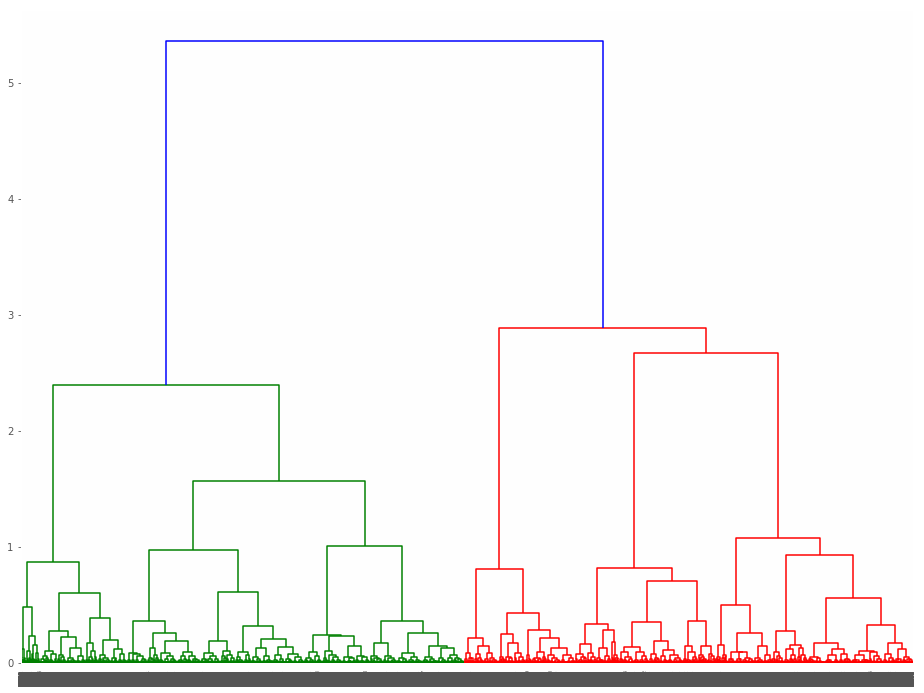

In [82]:
#plot dendrogram to visualize clusters
plot_dendrogram(categories)

In [24]:
# instantiate Agglomerative Clustering instance
clustering_model2 = AgglomerativeClustering(distance_threshold=0.2, n_clusters=None)

# call fit method with array of sample coordinates passed as a parameter
categories2 = clustering_model2.fit(X)

categories2.labels_

array([14, 32, 24, ..., 27, 36, 16])

In [25]:
df_locations['cluster2'] = categories2.labels_

In [26]:
len(df_locations['cluster'].value_counts())

28

In [27]:
len(df_locations['cluster2'].value_counts())

43

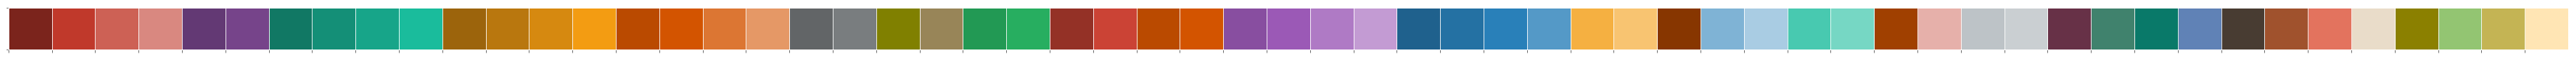

In [81]:
customPalette = ['#7b241c', '#c0392b', '#cd6155', '#d98880', '#633974', '#76448a',
                 '#117864', '#148f77', '#17a589', '#1abc9c',
                 '#9c640c', '#b9770e', '#d68910', '#f39c12',
                 '#ba4a00', '#d35400', '#dc7633', '#e59866', '#626567', '#797d7f',
                 '#808000', '#988558', '#229954', '#27ae60', '#943126', '#cb4335', '#ba4a00', '#d35400',
                 '#884ea0', '#9b59b6', '#af7ac5', '#c39bd3',
                 '#1f618d', '#2471a3', '#2980b9', '#5499c7', '#f5b041', '#f8c471', '#873600','#7fb3d5', '#a9cce3',
                 '#48c9b0', '#76d7c4', '#a04000', '#e6b0aa', '#bdc3c7', '#cacfd2',
                 '#673147', '#40826D', '#097969', '#6082B6', '#483C32', '#A0522D',
                 '#E3735E', '#E9DCC9', '#8B8000', '#93C572', '#C4B454', '#FFE5B4']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [61]:
labels = set(df_locations['cluster'].to_list())
labels2 = set(df_locations['cluster2'].to_list())

Text(0, 0.5, 'Latitude')

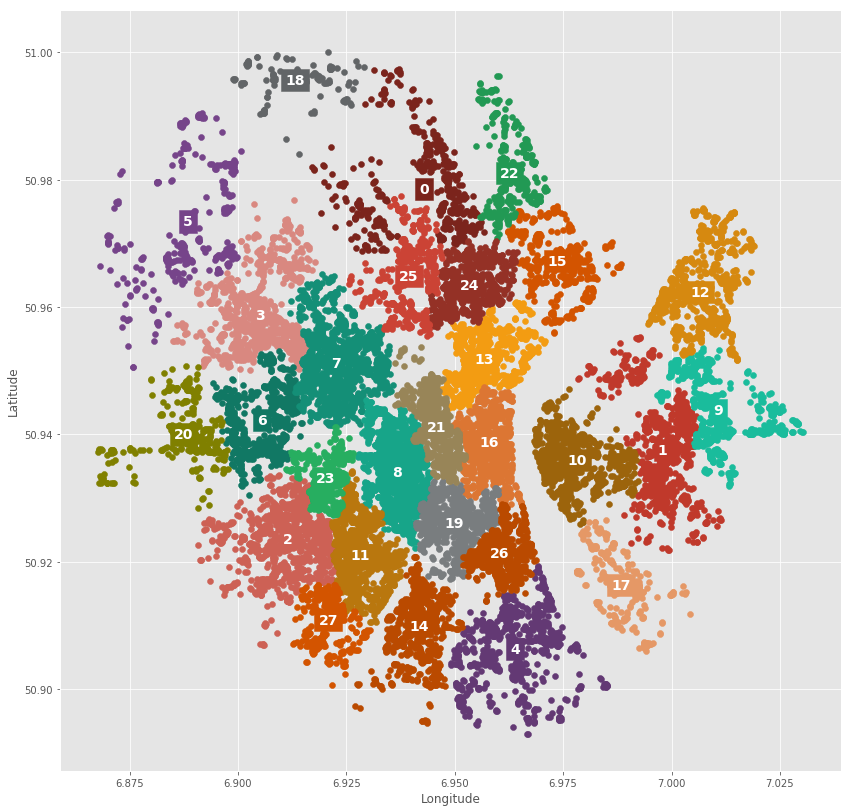

In [78]:
#create a new figure
plt.figure(figsize=(14,14))

#loop through labels and plot each cluster
for l in labels:

    #add data points 
    plt.scatter(x=df_locations.loc[df_locations['cluster']==l, 'lng'], 
                y=df_locations.loc[df_locations['cluster']==l, 'lat'], 
                color=customPalette[l], 
                alpha=1)
    
    #add label
    plt.annotate(l, 
                 df_locations.loc[df_locations['cluster']==l,['lng','lat']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=14, weight='bold',
                 color='white',
                 backgroundcolor=customPalette[l]) 
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [83]:
df_locations['cluster'].value_counts()

8     1763
7     1731
11    1375
2     1368
1     1285
3     1197
10    1141
16    1138
4      934
14     915
12     897
13     894
26     817
19     792
24     789
6      757
9      703
21     681
0      582
25     547
23     524
15     457
27     416
22     379
5      362
17     321
20     318
18     144
Name: cluster, dtype: int64

Text(0, 0.5, 'Latitude')

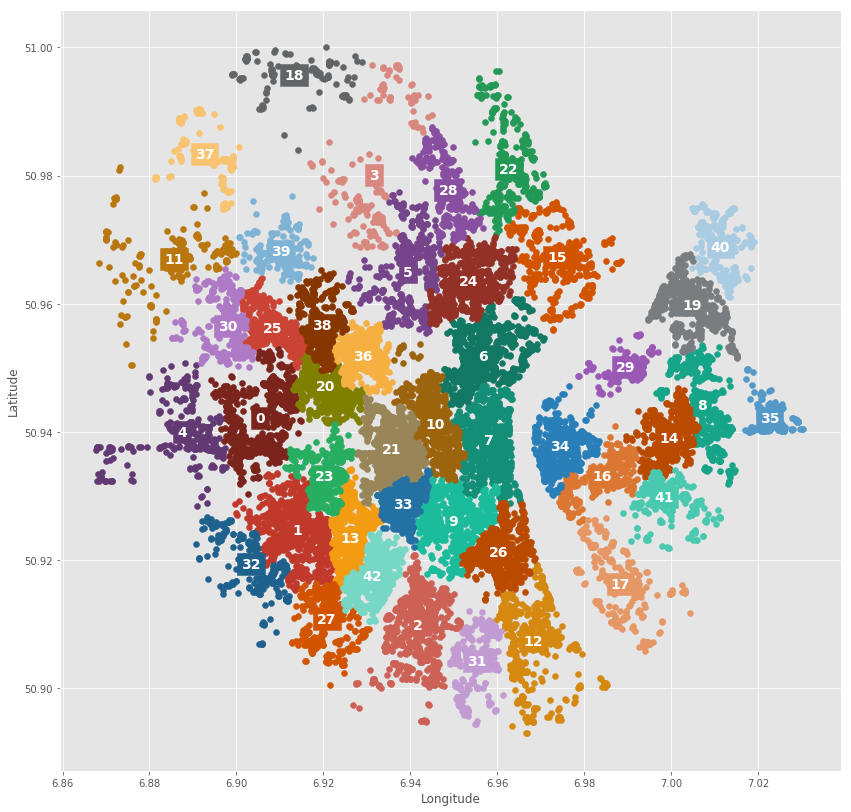

In [79]:
#create a new figure
plt.figure(figsize=(14,14))

#loop through labels and plot each cluster
for l in labels2:

    #add data points 
    plt.scatter(x=df_locations.loc[df_locations['cluster2']==l, 'lng'], 
                y=df_locations.loc[df_locations['cluster2']==l, 'lat'], 
                color=customPalette[l], 
                alpha=1)
    
    #add label
    plt.annotate(l, 
                 df_locations.loc[df_locations['cluster2']==l,['lng','lat']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=14, weight='bold',
                 color='white',
                 backgroundcolor=customPalette[l]) 
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### Long rides identification

In [87]:
url = "/bigdata/jelicicna/clustering_datasets/test_2021-01.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

In [88]:
print(len(df))

start_loc = []
for index, row in df.iterrows():
    loc_str = str([row['lat_begin'],row['lng_begin']])
    start_loc.append(loc_str)

end_loc = []
for index, row in df.iterrows():
    loc_str = str([row['lat_end'],row['lng_end']])
    end_loc.append(loc_str)

print(len(start_loc))
print(len(end_loc))

df['latlng'] = start_loc

df_merge_loc = df_locations[['loc_id', 'latlng', 'cluster']]

df_clusters = pd.merge(df, df_merge_loc, on='latlng', how='left')

cls = {'latlng':'latlng_start','loc_id':'loc_id_start', 'cluster':'cluster_start'}
df_clusters.rename(columns=cls, inplace=True) #renaming columns to match data about the start of the ride

print(len(df_clusters))


df_clusters['latlng'] = end_loc #setting ending locations as a joint column

df_clusters = pd.merge(df_clusters, df_merge_loc, on='latlng', how='left')

cls = {'latlng':'latlng_end','loc_id':'loc_id_end', 'cluster':'cluster_end'}
df_clusters.rename(columns=cls, inplace=True) #renaming columns to match data about the start of the ride

long_rides = []
for index, row in df_clusters.iterrows():
    if (row["ride_time"]>90) and (row["ride_time"]<200):
        long_rides.append(index)

print(len(long_rides))
print(len(df_clusters))

22644
22644
22644
22644
1249
22644


Text(0, 0.5, 'Latitude')

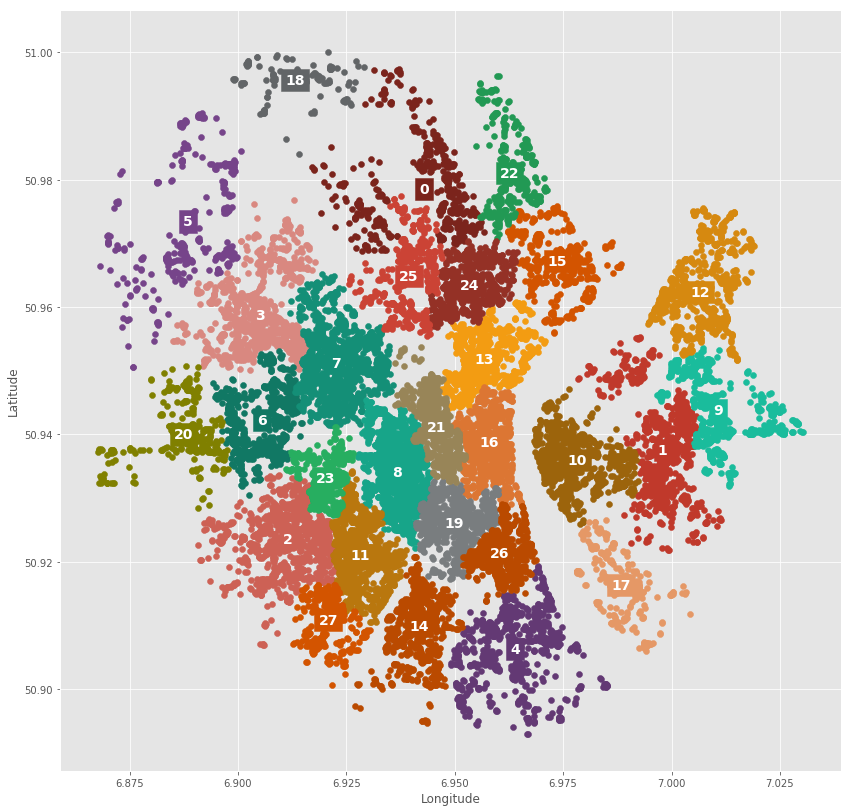

In [89]:
#create a new figure
plt.figure(figsize=(14,14))

#loop through labels and plot each cluster
for l in labels:

    #add data points 
    plt.scatter(x=df_locations.loc[df_locations['cluster']==l, 'lng'], 
                y=df_locations.loc[df_locations['cluster']==l, 'lat'], 
                color=customPalette[l], 
                alpha=1)
    
    #add label
    plt.annotate(l, 
                 df_locations.loc[df_locations['cluster']==l,['lng','lat']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=14, weight='bold',
                 color='white',
                 backgroundcolor=customPalette[l]) 
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [90]:
df_long_rides = df_clusters.iloc[long_rides]

return_rides = []
for index, row in df_long_rides.iterrows():
    if row['cluster_start'] == row['cluster_end']:
        return_rides.append(index)

269


/ssd/jelicicna/thesisenv/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
center_destination = []
for index, row in df_long_rides.iterrows():
    if (row['cluster_end'] == 16) or (row['cluster_end'] == 21) or (row['cluster_end'] == 19):
        center_destination.append(index)

In [99]:
center_origin = []
for index, row in df_long_rides.iterrows():
    if (row['cluster_start'] == 16) or (row['cluster_start'] == 21) or (row['cluster_start'] == 19):
        center_origin.append(index)

In [102]:
print(len(long_rides))
print(len(return_rides))
print(len(center_destination))
print(len(center_origin))

1249
269
135
140
